<a href="https://colab.research.google.com/github/nimadetaniar/snmptn-logistic-regression/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
pip install dominance-analysis

     |████████████████████████████████| 15.7MB 192kB/s 
     |████████████████████████████████| 25.9MB 123kB/s 
  Created wheel for dominance-analysis: filename=dominance_analysis-1.1.7-cp37-none-any.whl size=12846 sha256=76453d4f3b79453c6b6c4d40ddae542cefe586d60aeddb215f2ffbe4da64a6fb
  Stored in directory: /root/.cache/pip/wheels/69/f0/1d/4ac3045a05282a123eae2fc5243dc37baf6cefd2010118b971
Successfully built dominance-analysis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.

In [ ]:
from dominance_analysis import Dominance

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
1 #memasukkan data snmptn
data_snmptn = pd.read_excel('/content/drive/MyDrive/[Bimbingan Tesis]-NI MADE TARANITA ARIANI/Dokumen/SELURUH-UJICOBA.xlsx')
data_snmptn.head()

1 #memilih fitur
selected_snmptn = data_snmptn[["STATUS SNMPTN","NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]]
selected_for_db = selected_snmptn

In [ ]:
1 #mengubah fitur kategorikal menjadi 0 dan 1
selected_snmptn['STATUS SNMPTN'] = selected_snmptn['STATUS SNMPTN'].map({'DITERIMA': 1, 'TIDAK DITERIMA': 0})

selected_snmptn.head(20)

,STATUS SNMPTN,NILAI RATA-RATA RAPOR,NILAI RATA-RATA MAPEL UN,PRESTASI
0,1,87.28,85.23,0.0
1,1,86.33,85.10,0.0
2,1,87.88,86.55,0.0
3,1,85.31,83.37,0.0
4,1,83.34,81.78,0.0
5,1,82.19,79.83,0.0
6,1,85.61,81.72,0.0
7,1,86.46,84.93,0.0
8,1,86.85,85.03,0.0
9,1,85.59,82.25,0.0


In [ ]:
Y = selected_snmptn.iloc[:,0].values
print(Y)


[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

percentage of TIDAK DITERIMA :  9579.0
percentage of DITERIMA 421.0


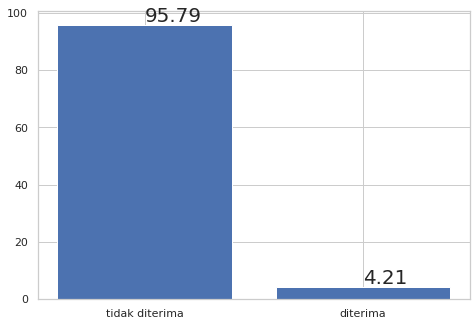

In [ ]:
1 # menghitung perbandingan siswa yang tidak diterima dan diterima snmptn
count_TIDAK_DITERIMA = len(selected_snmptn[selected_snmptn['STATUS SNMPTN']==0])
count_DITERIMA = len(selected_snmptn[selected_snmptn['STATUS SNMPTN']==1])
pct_of_TIDAK_DTIERIMA = round((count_TIDAK_DITERIMA/(count_TIDAK_DITERIMA + count_DITERIMA)*100),2)
print("percentage of TIDAK DITERIMA : ", pct_of_TIDAK_DTIERIMA*100)
pct_of_DITERIMA = round((count_DITERIMA/(count_TIDAK_DITERIMA + count_DITERIMA)*100),2)
print("percentage of DITERIMA", pct_of_DITERIMA*100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['tidak diterima', 'diterima']
val = [pct_of_TIDAK_DTIERIMA, pct_of_DITERIMA]
ax.bar(langs,val)
for index,data in enumerate(val):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.show()

In [ ]:
# Importing the splitter, classification model, and the metric
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#import library smote
from imblearn.over_sampling import SMOTE
#import library 
import statsmodels.api as sm




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
#Create an oversampled training data
smote = SMOTE(random_state = 101)

In [ ]:
# 2 | MODEL DENGAN 3 FITUR

#Splitting the data with stratification
X_trainALL, X_testALL, y_trainALL, y_testALL = train_test_split(selected_snmptn[["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]], 
                                                    selected_snmptn['STATUS SNMPTN'], test_size = 0.2, stratify = selected_snmptn['STATUS SNMPTN'], random_state = 101)

490.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



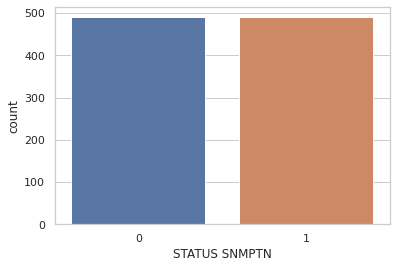

In [ ]:
# 2 | MODEL DENGAN 3 FITUR
XALL_oversample, yALL_oversample = smote.fit_resample(X_trainALL, y_trainALL)
dfALL_oversampler = pd.concat([pd.DataFrame(XALL_oversample, columns = ["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]), pd.DataFrame(yALL_oversample, columns=['STATUS SNMPTN'])], axis=1)

sns.countplot(dfALL_oversampler['STATUS SNMPTN'])
jumlahALL = dfALL_oversampler['STATUS SNMPTN'].count()
print(jumlahALL/2)

In [ ]:
dfALL_oversampler = dfALL_oversampler.drop(['intercept'], axis = 1)


KeyError: ignored

In [ ]:
dfALL_oversampler


,NILAI RATA-RATA RAPOR,NILAI RATA-RATA MAPEL UN,PRESTASI,STATUS SNMPTN
0,83.630000,82.710000,0.0,0
1,85.660000,85.430000,0.0,0
2,80.610000,77.480000,0.0,0
3,85.190000,82.630000,0.0,0
4,82.400000,80.000000,0.0,0
...,...,...,...,...
975,87.961784,87.308265,0.0,1
976,84.418934,83.899878,0.0,1
977,87.884411,86.095630,0.0,1
978,87.572009,85.368824,0.0,1


In [ ]:
#membuat model logit dengan variabel y dan X dan fit data
logit_model_ALL=sm.Logit(yALL_oversample, XALL_oversample)
result_ALL=logit_model_ALL.fit()

#mencetak hasil model 
print(result_ALL.summary2())

Optimization terminated successfully.
         Current function value: 0.673571
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.028     
Dependent Variable: y                AIC:              1326.2001 
Date:               2021-06-18 08:58 BIC:              1340.8627 
No. Observations:   980              Log-Likelihood:   -660.10   
Df Model:           2                LL-Null:          -679.28   
Df Residuals:       977              LLR p-value:      4.6602e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0688      0.0273     2.5172    0.0118     0.0152     0.1223
x2    -0.0686      0.0278    -2.4685    0.0136    -0.1

In [ ]:
dominance_classification=Dominance(data=dfALL_oversampler,target='STATUS SNMPTN',top_k = None,objective=1,pseudo_r2="nagelkerke")

Selecting 3 Best Predictors for the Model
Selected Predictors :  ['NILAI RATA-RATA RAPOR', 'NILAI RATA-RATA MAPEL UN', 'PRESTASI']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.3192196639552426



In [ ]:
print(np.exp(result_ALL.params))

[1.07120823 0.93374469 0.75504728]


In [ ]:
# 2 | MODEL DENGAN 3 FITUR
#Training with oversampled data
classifier_oALL = LogisticRegression()
classifier_oALL.fit(XALL_oversample, yALL_oversample)
#print(classification_report(y_testALL, classifier_oALL.predict(X_testALL)))

NameError: ignored

In [ ]:
classifier_oALL = LogisticRegression()
classifier_oALL.fit(XALL_oversample, yALL_oversample)
print(classification_report(yALL_oversample, classifier_oALL.predict(XALL_oversample)))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       490
           1       0.77      0.82      0.80       490

    accuracy                           0.79       980
   macro avg       0.79      0.79      0.79       980
weighted avg       0.79      0.79      0.79       980



In [ ]:
# 2 | MODEL DENGAN 3 FITUR
y_predALL = classifier_oALL.predict(X_testALL)
print('Accuracy of logistic regression (3 FITUR) classifier on test set: {:.2f}'.format(classifier_oALL.score(X_testALL, y_testALL)))

Accuracy of logistic regression (3 FITUR) classifier on test set: 0.69


In [ ]:
y_testALL.reset_index()

,index,STATUS SNMPTN
0,478,0
1,195,0
2,87,0
3,566,0
4,583,0
...,...,...
124,626,0
125,331,0
126,6,1
127,480,0


In [ ]:
# 2 | MODEL DENGAN 3 FITUR

labelsALL = np.unique(y_testALL)
confusion_matrix_ALL = confusion_matrix(y_testALL, y_predALL, labels=labelsALL)

#print(confusion_matrix)

pd.DataFrame(confusion_matrix_ALL, index=labelsALL, columns=labelsALL)

,0,1
0,86,38
1,2,3


In [ ]:
# 2 | MODEL DENGAN 3 FITUR

target_names_ALL = ['Tidak Diterima','Diterima']
print(classification_report(y_testALL, y_predALL, target_names=target_names_ALL))

                precision    recall  f1-score   support

Tidak Diterima       0.98      0.69      0.81       124
      Diterima       0.07      0.60      0.13         5

      accuracy                           0.69       129
     macro avg       0.53      0.65      0.47       129
  weighted avg       0.94      0.69      0.78       129



In [ ]:
combine= classification_report(y_testALL, y_predALL, target_names=target_names_ALL,output_dict=True)
dfREPORT = pd.DataFrame(combine).transpose()
dfREPORT.to_excel(r'Hasil Report.xlsx')

In [ ]:
def efron_rsquare(y_testALL, y_predALL):
    n = float(len(y_testALL))
    t1 = np.sum(np.power(y_testALL - y_predALL, 2.0))
    t2 = np.sum(np.power((y_testALL - (np.sum(y_testALL) / n)), 2.0))
    return 1.0 - (t1 / t2)

In [ ]:
efron_rsquare(y_testALL, y_predALL)

-7.530645161290321

In [ ]:
def mz_rsquare(y_predALL):
    return np.var(y_predALL) / (np.var(y_predALL) + (np.power(np.pi, 2.0) / 3.0) )

In [ ]:
mz_rsquare(y_predALL)


0.06256774789505185

In [ ]:
def get_num_correct(y_testALL, y_predALL, t=0.5):
    y_correct = np.array([0.0 if p < t else 1.0 for p in y_predALL])
    return sum([1.0 for p, p_pred in zip(y_testALL, y_correct) if p == p_pred])

def count_rsquare(y_testALL, y_predALL, t=0.5):
    n = float(len(y_testALL))
    num_correct = get_num_correct(y_testALL, y_predALL, t)
    return num_correct / n

def get_count_most_freq_outcome(y_testALL):
    num_0 = 0
    num_1 = 0
    for p in y_testALL:
        if p == 1.0:
            num_1 += 1
        else:
            num_0 += 1
    return float(max(num_0, num_1))

def count_adjusted_rsquare(y_testALL, y_predALL, t=0.5):
    correct = get_num_correct(y_testALL, y_predALL, t)
    total = float(len(y_testALL))
    n = get_count_most_freq_outcome(y_testALL)
    return (correct - n) / (total - n)

count_rsquare(y_testALL, y_predALL)
#count_adjusted_rsquare(y_testALL, y_predALL)

0.6821705426356589

In [ ]:
prediction = list(map(round, y_predALL))
#selected_snmptn['STATUS SNMPTN'] = selected_snmptn['STATUS SNMPTN'].map({'DITERIMA': 1, 'TIDAK DITERIMA': 0})

print('nilaisli:', list(y_testALL))
print('prediksi:', prediction)

nilaisli: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prediksi: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [ ]:
selected_X_testALL = X_testALL.reset_index()
class_pred = pd.DataFrame(y_predALL)
class_pred.columns = ['class_predicted']
y_testALL_reset = y_testALL.reset_index()
y_testALL_reset = y_testALL_reset.drop(['index'], axis = 1)
class_test = pd.DataFrame(y_testALL_reset)
class_test.columns = ['class_test']
combinedDf2 = pd.concat([selected_X_testALL, class_test,class_pred], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)
combinedDf2.head(10)
combinedDf2.to_excel(r'Hasil Prediksi.xlsx')

In [ ]:
y_testALL

In [ ]:
#nondeeem

selected_X_testALL = X_testALL
class_pred = pd.DataFrame(y_predALL)
class_pred.columns = ['class_predicted']
class_test = pd.DataFrame(y_testALL)
class_test.columns = ['class_test']
combinedDf2 = pd.concat([selected_X_testALL, class_test], axis = 1)
#combinedDf2 = combinedDf2.drop(['index', 'level_0'], axis = 1)
combinedDf2.sort_index()

In [ ]:
class_test.sort_index()


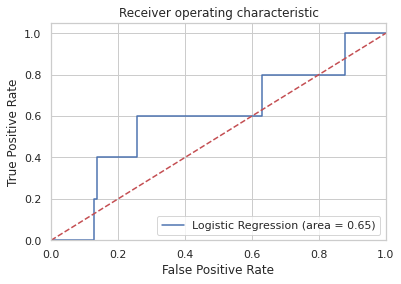

In [ ]:
logit_roc_auc_ALL = roc_auc_score(y_testALL, classifier_oALL.predict(X_testALL))
fprALL, tprALL, thresholdsALL = roc_curve(y_testALL, classifier_oALL.predict_proba(X_testALL)[:,1])

plt.figure()
plt.plot(fprALL, tprALL, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_ALL)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# 3 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN"

#Splitting the data with stratification
X_trainRU, X_testRU, y_trainRU, y_testRU = train_test_split(selected_snmptn[["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN"]], 
                                                    selected_snmptn['STATUS SNMPTN'], test_size = 0.2, stratify = selected_snmptn['STATUS SNMPTN'], random_state = 101)

490.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



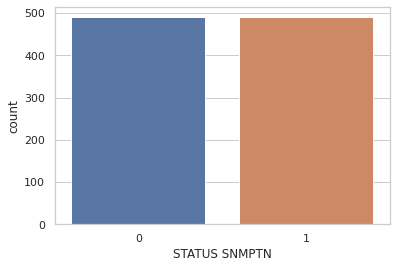

In [ ]:
# 3 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN"

XRU_oversample, yRU_oversample = smote.fit_resample(X_trainRU, y_trainRU)
dfRU_oversampler = pd.concat([pd.DataFrame(XRU_oversample, columns = ["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN"]), pd.DataFrame(yRU_oversample, columns=['STATUS SNMPTN'])], axis=1)

sns.countplot(dfRU_oversampler['STATUS SNMPTN'])
jumlahRU = dfRU_oversampler['STATUS SNMPTN'].count()
print(jumlahRU/2)

In [ ]:
#membuat model logit dengan variabel y dan X dan fit data
logit_model_RU=sm.Logit(yRU_oversample, XRU_oversample)
result_RU=logit_model_RU.fit()

#mencetak hasil model 
print(result_RU.summary2())

Optimization terminated successfully.
         Current function value: 0.689043
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.006    
Dependent Variable: y                AIC:              1354.5241
Date:               2021-06-18 08:59 BIC:              1364.2992
No. Observations:   980              Log-Likelihood:   -675.26  
Df Model:           1                LL-Null:          -679.28  
Df Residuals:       978              LLR p-value:      0.0045645
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.0734     0.0271    2.7035   0.0069    0.0202    0.1266
x2       -0.0742     0.0276   -2.6885   0.0072   -0.1282   -0.0201



In [ ]:
print(np.exp(result_RU.params))

[1.07615976 0.9285229 ]


In [ ]:
dfRU_oversampler

,NILAI RATA-RATA RAPOR,NILAI RATA-RATA MAPEL UN,STATUS SNMPTN
0,83.630000,82.710000,0
1,85.660000,85.430000,0
2,80.610000,77.480000,0
3,85.190000,82.630000,0
4,82.400000,80.000000,0
...,...,...,...
975,87.961784,87.308265,1
976,84.418934,83.899878,1
977,87.884411,86.095630,1
978,87.572009,85.368824,1


In [ ]:
dominance_classification=Dominance(data=dfRU_oversampler,target='STATUS SNMPTN',top_k = None,objective=1,pseudo_r2="nagelkerke")

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['NILAI RATA-RATA RAPOR', 'NILAI RATA-RATA MAPEL UN']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.3021920071035258



In [ ]:
dominance_classification=Dominance(data=dfRU_oversampler,target='STATUS SNMPTN',top_k = None,objective=1,pseudo_r2="nagelkerke")
combineRU= classification_report(y_testRU, y_predRU, target_names=target_names_RU,output_dict=True)
dfREPORTRU = pd.DataFrame(combineRU).transpose()
dfREPORTRU.to_excel(r'Hasil ReportRU.xlsx')

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['NILAI RATA-RATA RAPOR', 'NILAI RATA-RATA MAPEL UN']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.3021920071035258



In [ ]:
selected_X_testRU = X_testRU.reset_index()
class_predRU = pd.DataFrame(y_predRU)
class_predRU.columns = ['class_predicted']
#print(classification_report(y_testRU, classifier_oRU.predict(X_testRU)))
y_testRU_reset = y_testRU.reset_index()
y_testRU_reset = y_testRU_reset.drop(['index'], axis = 1)
class_testRU = pd.DataFrame(y_testRU_reset)
class_testRU.columns = ['class_test']
combinedDfRU = pd.concat([selected_X_testRU, class_testRU,class_predRU], axis = 1).reset_index()
combinedDfRU = combinedDfRU.drop(['index', 'level_0'], axis = 1)
combinedDfRU.head(10)
combinedDfRU.to_excel(r'Hasil PrediksiRU.xlsx')

In [ ]:
# 3 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN"
#Training with oversampled data
classifier_oRU = LogisticRegression()
classifier_oRU.fit(XRU_oversample, yRU_oversample)
print(classification_report(y_testRU, classifier_oRU.predict(X_testRU)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       124
           1       0.09      0.80      0.17         5

    accuracy                           0.69       129
   macro avg       0.54      0.74      0.49       129
weighted avg       0.95      0.69      0.78       129



In [ ]:
# 3 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN"
y_predRU = classifier_oRU.predict(X_testRU)
print('Accuracy of logistic regression (FITUR "NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN") classifier on test set: {:.2f}'.format(classifier_oRU.score(X_testRU, y_testRU)))

Accuracy of logistic regression (FITUR "NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN") classifier on test set: 0.69


In [ ]:
# 3 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN"
labelsRU = np.unique(y_testRU)
confusion_matrix_RU = confusion_matrix(y_testRU, y_predRU, labels=labelsRU)

#print(confusion_matrix)

pd.DataFrame(confusion_matrix_RU, index=labelsRU, columns=labelsRU)

,0,1
0,85,39
1,1,4


In [ ]:
target_names_RU = ['Tidak Diterima','Diterima']
print(classification_report(y_testRU, y_predRU, target_names=target_names_RU))

                precision    recall  f1-score   support

Tidak Diterima       0.99      0.69      0.81       124
      Diterima       0.09      0.80      0.17         5

      accuracy                           0.69       129
     macro avg       0.54      0.74      0.49       129
  weighted avg       0.95      0.69      0.78       129



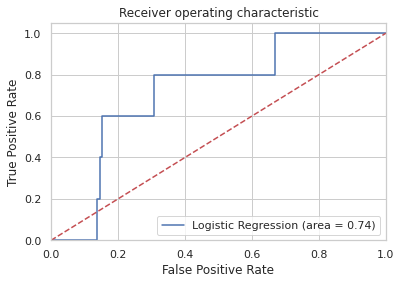

In [ ]:
logit_roc_auc_RU = roc_auc_score(y_testRU, classifier_oRU.predict(X_testRU))
fprRU, tprRU, thresholdsRU = roc_curve(y_testRU, classifier_oRU.predict_proba(X_testRU)[:,1])

plt.figure()
plt.plot(fprRU, tprRU, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_RU)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# 4 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA MAPEL UN","PRESTASI"

#Splitting the data with stratification
X_trainUP, X_testUP, y_trainUP, y_testUP = train_test_split(selected_snmptn[["NILAI RATA-RATA MAPEL UN","PRESTASI"]], 
                                                    selected_snmptn['STATUS SNMPTN'], test_size = 0.2, stratify = selected_snmptn['STATUS SNMPTN'], random_state = 101)

490.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



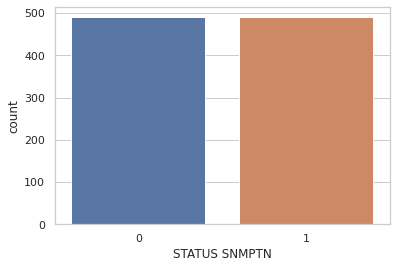

In [ ]:
# 4 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA MAPEL UN","PRESTASI"

XUP_oversample, yUP_oversample = smote.fit_resample(X_trainUP, y_trainUP)
dfUP_oversampler = pd.concat([pd.DataFrame(XUP_oversample, columns = ["NILAI RATA-RATA MAPEL UN","PRESTASI"]), pd.DataFrame(yUP_oversample, columns=['STATUS SNMPTN'])], axis=1)

sns.countplot(dfUP_oversampler['STATUS SNMPTN'])
jumlahUP = dfUP_oversampler['STATUS SNMPTN'].count()
print(jumlahUP/2)

In [ ]:
#membuat model logit dengan variabel y dan X dan fit data
logit_model_UP=sm.Logit(yUP_oversample, XUP_oversample)
result_UP=logit_model_UP.fit()

#mencetak hasil model 
print(result_UP.summary2())

Optimization terminated successfully.
         Current function value: 0.676949
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.023     
Dependent Variable: y                AIC:              1330.8193 
Date:               2021-06-18 09:00 BIC:              1340.5944 
No. Observations:   980              Log-Likelihood:   -663.41   
Df Model:           1                LL-Null:          -679.28   
Df Residuals:       978              LLR p-value:      1.7542e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0014      0.0008     1.7410    0.0817    -0.0002     0.0029
x2    -0.2885      0.0750    -3.8466    0.0001    -0.4

In [ ]:
print(np.exp(result_UP.params))

[1.00136488 0.74934988]


In [ ]:
dominance_classification=Dominance(data=dfUP_oversampler,target='STATUS SNMPTN',top_k = None,objective=1,pseudo_r2="nagelkerke")

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['NILAI RATA-RATA MAPEL UN', 'PRESTASI']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.14984404857092526



In [ ]:
combineUP= classification_report(y_testUP, y_predUP, target_names=target_names_UP,output_dict=True)
dfREPORTUP = pd.DataFrame(combineUP).transpose()
dfREPORTUP.to_excel(r'Hasil ReportUP.xlsx')

In [ ]:
selected_X_testUP = X_testUP.reset_index()
class_predUP = pd.DataFrame(y_predUP)
class_predUP.columns = ['class_predicted']
#print(classification_report(y_testRU, classifier_oRU.predict(X_testRU)))
y_testUP_reset = y_testUP.reset_index()
y_testUP_reset =y_testUP_reset.drop(['index'], axis = 1)
class_testUP = pd.DataFrame(y_testUP_reset)
class_testUP.columns = ['class_test']
combinedDfUP = pd.concat([selected_X_testUP, class_testUP,class_predUP], axis = 1).reset_index()
combinedDfUP = combinedDfUP.drop(['index', 'level_0'], axis = 1)
combinedDfUP.head(10)
combinedDfUP.to_excel(r'Hasil PrediksiUP.xlsx')

In [ ]:
# 4 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA MAPEL UN","PRESTASI"
#Training with oversampled data
classifier_oUP = LogisticRegression()
classifier_oUP.fit(XUP_oversample, yUP_oversample)
print(classification_report(y_testUP, classifier_oUP.predict(X_testUP)))

              precision    recall  f1-score   support

           0       0.95      0.65      0.78       124
           1       0.02      0.20      0.04         5

    accuracy                           0.64       129
   macro avg       0.49      0.43      0.41       129
weighted avg       0.92      0.64      0.75       129



In [ ]:
# 4 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA MAPEL UN","PRESTASI"
y_predUP = classifier_oUP.predict(X_testUP)
print('Accuracy of logistic regression (FITUR "NILAI RATA-RATA MAPEL UN","PRESTASI") classifier on test set: {:.2f}'.format(classifier_oUP.score(X_testUP, y_testUP)))

Accuracy of logistic regression (FITUR "NILAI RATA-RATA MAPEL UN","PRESTASI") classifier on test set: 0.64


In [ ]:
# 4 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA MAPEL UN","PRESTASI"
labelsUP = np.unique(y_testUP)
confusion_matrix_UP = confusion_matrix(y_testUP, y_predUP, labels=labelsUP)

#print(confusion_matrix)

pd.DataFrame(confusion_matrix_UP, index=labelsUP, columns=labelsUP)

,0,1
0,81,43
1,4,1


In [ ]:
target_names_UP = ['Tidak Diterima','Diterima']
print(classification_report(y_testUP, y_predUP, target_names=target_names_UP))

                precision    recall  f1-score   support

Tidak Diterima       0.95      0.65      0.78       124
      Diterima       0.02      0.20      0.04         5

      accuracy                           0.64       129
     macro avg       0.49      0.43      0.41       129
  weighted avg       0.92      0.64      0.75       129



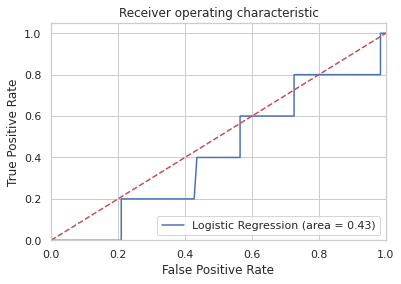

In [ ]:
logit_roc_auc_UP = roc_auc_score(y_testUP, classifier_oUP.predict(X_testUP))
fprUP, tprUP, thresholdsUP = roc_curve(y_testUP, classifier_oUP.predict_proba(X_testUP)[:,1])

plt.figure()
plt.plot(fprUP, tprUP, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_UP)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# 5 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","PRESTASI"

#Splitting the data with stratification
X_trainRP, X_testRP, y_trainRP, y_testRP = train_test_split(selected_snmptn[["NILAI RATA-RATA RAPOR","PRESTASI"]], 
                                                    selected_snmptn['STATUS SNMPTN'], test_size = 0.2, stratify = selected_snmptn['STATUS SNMPTN'], random_state = 101)

490.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



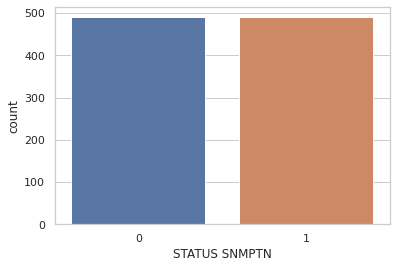

In [ ]:
# 5 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","PRESTASI"

XRP_oversample, yRP_oversample = smote.fit_resample(X_trainRP, y_trainRP)
dfRP_oversampler = pd.concat([pd.DataFrame(XRP_oversample, columns = ["NILAI RATA-RATA RAPOR","PRESTASI"]), pd.DataFrame(yRP_oversample, columns=['STATUS SNMPTN'])], axis=1)

sns.countplot(dfRP_oversampler['STATUS SNMPTN'])
jumlahRP = dfRP_oversampler['STATUS SNMPTN'].count()
print(jumlahRP/2)

In [ ]:
#membuat model logit dengan variabel y dan X dan fit data
logit_model_RP=sm.Logit(yRP_oversample, XRP_oversample)
result_RP=logit_model_RP.fit()

#mencetak hasil model 
print(result_RP.summary2())

Optimization terminated successfully.
         Current function value: 0.676873
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.023     
Dependent Variable: y                AIC:              1330.6706 
Date:               2021-06-18 09:02 BIC:              1340.4457 
No. Observations:   980              Log-Likelihood:   -663.34   
Df Model:           1                LL-Null:          -679.28   
Df Residuals:       978              LLR p-value:      1.6250e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0014      0.0008     1.7830    0.0746    -0.0001     0.0029
x2    -0.2890      0.0750    -3.8510    0.0001    -0.4

In [ ]:
dominance_classification=Dominance(data=dfRP_oversampler,target='STATUS SNMPTN',top_k = None,objective=1,pseudo_r2="nagelkerke")


Selecting 2 Best Predictors for the Model
Selected Predictors :  ['NILAI RATA-RATA RAPOR', 'PRESTASI']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.29466555644991865



In [ ]:
print(np.exp(result_RP.params))

[1.00137647 0.74904053]


In [ ]:
combineRP= classification_report(y_testRP, y_predRP, target_names=target_names_RP,output_dict=True)
dfREPORTRP = pd.DataFrame(combineRP).transpose()
dfREPORTRP.to_excel(r'Hasil ReportRP.xlsx')
selected_X_testRP = X_testRP.reset_index()


NameError: ignored

In [ ]:
class_predRP = pd.DataFrame(y_predRP)
class_predRP.columns = ['class_predicted']
#print(classification_report(y_testRU, classifier_oRU.predict(X_testRU)))
y_testRP_reset = y_testRP.reset_index()
y_testRP_reset =y_testRP_reset.drop(['index'], axis = 1)
class_testRP = pd.DataFrame(y_testRP_reset)
class_testRP.columns = ['class_test']
combinedDfRP = pd.concat([selected_X_testRP, class_testRP,class_predRP], axis = 1).reset_index()
combinedDfRP = combinedDfRP.drop(['index', 'level_0'], axis = 1)
combinedDfRP.head(10)
combinedDfRP.to_excel(r'Hasil PrediksiRP.xlsx')

In [ ]:
# 5 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","PRESTASI"

#Training with oversampled data
classifier_oRP = LogisticRegression()
classifier_oRP.fit(XRP_oversample, yRP_oversample)
print(classification_report(y_testRP, classifier_oRP.predict(X_testRP)))

              precision    recall  f1-score   support

           0       0.98      0.67      0.79       124
           1       0.07      0.60      0.12         5

    accuracy                           0.67       129
   macro avg       0.52      0.63      0.46       129
weighted avg       0.94      0.67      0.77       129



In [ ]:
# 5 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","PRESTASI"
y_predRP = classifier_oRP.predict(X_testRP)
print('Accuracy of logistic regression (FITUR "NILAI RATA-RATA RAPOR","PRESTASI") classifier on test set: {:.2f}'.format(classifier_oRP.score(X_testRP, y_testRP)))

Accuracy of logistic regression (FITUR "NILAI RATA-RATA RAPOR","PRESTASI") classifier on test set: 0.67


In [ ]:
# 5 | MODEL DENGAN 2 FITUR "NILAI RATA-RATA RAPOR","PRESTASI"
labelsRP = np.unique(y_testRP)
confusion_matrix_RP = confusion_matrix(y_testRP, y_predRP, labels=labelsRP)

#print(confusion_matrix)

pd.DataFrame(confusion_matrix_RP, index=labelsRP, columns=labelsRP)

,0,1
0,83,41
1,2,3


In [ ]:
target_names_RP = ['Tidak Diterima','Diterima']
print(classification_report(y_testRP, y_predRP, target_names=target_names_RP))

jumlahRP = list(y_testRP).count(0)
print(jumlahRP)


                precision    recall  f1-score   support

Tidak Diterima       0.98      0.67      0.79       124
      Diterima       0.07      0.60      0.12         5

      accuracy                           0.67       129
     macro avg       0.52      0.63      0.46       129
  weighted avg       0.94      0.67      0.77       129

124


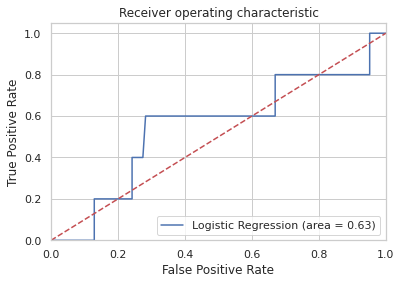

In [ ]:
logit_roc_auc_RP = roc_auc_score(y_testRP, classifier_oRP.predict(X_testRP))
fprRP, tprRP, thresholdsRP = roc_curve(y_testRP, classifier_oRP.predict_proba(X_testRP)[:,1])

plt.figure()
plt.plot(fprRP, tprRP, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_RP)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(selected_snmptn[["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]], 
                                                    selected_snmptn['STATUS SNMPTN'], test_size = 0.2, stratify = selected_snmptn['STATUS SNMPTN'], random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)
df_oversampler = pd.concat([pd.DataFrame(X_oversample, columns = ["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]), pd.DataFrame(y_oversample, columns=['STATUS SNMPTN'])], axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
####3333
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(selected_snmptn[["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]], 
                                                    selected_snmptn['STATUS SNMPTN'], test_size = 0.2, stratify = selected_snmptn['STATUS SNMPTN'], random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)
df_oversampler = pd.concat([pd.DataFrame(X_oversample, columns = ["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]), pd.DataFrame(y_oversample, columns=['STATUS SNMPTN'])], axis=1)

#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
classifier_o = LogisticRegression()
y_pred = classifier_o.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier_o.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


NotFittedError: ignored

In [ ]:
#######3333
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
confusion_matrix = confusion_matrix(y_test, y_pred, labels=labels)

#print(confusion_matrix)

pd.DataFrame(confusion_matrix, index=labels, columns=labels)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Tidak Diterima','Diterima']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier_o.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier_o.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#import library 
import statsmodels.api as sm

#membuat model logit dengan variabel y dan X dan fit data
logit_model=sm.Logit(y_oversample, X_oversample)
result=logit_model.fit()

#mencetak hasil model 
print(result.summary2())


In [ ]:
#import logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
prediction = list(map(round, y_pred))
#selected_snmptn['STATUS SNMPTN'] = selected_snmptn['STATUS SNMPTN'].map({'DITERIMA': 1, 'TIDAK DITERIMA': 0})

print('nilaisli:', list(y_test))
print('prediksi:', prediction)



In [ ]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
confusion_matrix = confusion_matrix(y_test, y_pred, labels=labels)

#print(confusion_matrix)

pd.DataFrame(confusion_matrix, index=labels, columns=labels)



In [ ]:
from sklearn.metrics import classification_report
target_names = ['Tidak Diterima','Diterima']
print(classification_report(y_test, y_pred, target_names=target_names))


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#output = pd.DataFrame(data = {"id":X_test["NILAI RATA-RATA MAPEL UN"],"Prediction":y_pred}) 

#output.to_csv(path_or_buf="'/content/drive/MyDrive/[Bimbingan Tesis]-NI MADE TARANITA ARIANI/Dokumen/results.csv",index=False,quoting=3,sep=';')

res = pd.DataFrame(prediction)
res.index = X_test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")

# Bagian Baru

In [ ]:
#####1111111111111111##############

#menyimpan nilai variabel independen ke dalam 'X'dan dependen ke dalam 'y'

X = selected_snmptn.loc[:, selected_snmptn.columns != 'STATUS SNMPTN']
y = selected_snmptn.loc[:, selected_snmptn.columns == 'STATUS SNMPTN']

#import library smote
from imblearn.over_sampling import SMOTE

#smote mengontrol randomization algoritma dengan nilai 0
OS = SMOTE(random_state=1)

#membuat variabel train dan tes untuk X dan y dengan ukuran data uji sebesar 0,3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#inisiasi var columns dengan kolomnya X train
columns = X_train.columns

#inisiasi OS_X, OS_Y dengan x dan y train dengan SMOTE fungsi fit sample
OS_X, OS_Y = OS.fit_sample(X_train, y_train)

#membuat dataframe OS_X dengan data dari train OS_X dengan kolom dari columns
OS_X = pd.DataFrame(data= OS_X, columns=columns)

#membuat dataframe OS_Y dengan data dari train OS_y dengan kolom dari 'y' yaitu 
#'status_snmptn'
OS_Y = pd.DataFrame(data= OS_Y, columns=['y'])

print("length of oversampled data is ",len(OS_X))

print("Number of TIDAK DITERIMA in oversampled data",len(OS_Y[OS_Y['y']==0]))
print("Number of DITERIMA",len(OS_Y[OS_Y['y']==1]))
print("Proportion of TIDAK DITERIMA data in oversampled data is ",len(OS_Y[OS_Y['y']==0])/len(OS_X))
print("Proportion of DITERIMA data in oversampled data is ",len(OS_Y[OS_Y['y']==1])/len(OS_X))

In [ ]:
#####22222222222222222222##############
#Training with imbalance data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test)))

In [ ]:
#####22222222222222222222##############
#Training with oversampled data OSX OSY
classifier_o = LogisticRegression()
classifier_o.fit(OS_X, OS_Y)
print(classification_report(y_test, classifier_o.predict(X_test)))

In [ ]:
#import library 
import statsmodels.api as sm

#membuat model logit dengan variabel y dan X dan fit data
logit_model=sm.Logit(OS_Y, OS_X)
result=logit_model.fit()

#mencetak hasil model 
print(result.summary2())

In [ ]:
#####22222222222222222222##############
#import library smote
from imblearn.over_sampling import SMOTE

#smote mengontrol randomization algoritma dengan nilai 101
OS = SMOTE(random_state=101)

#inisiasi OS_X, OS_Y dengan x dan y train dengan SMOTE fungsi fit sample
OS_X, OS_Y = OS.fit_resample(selected_snmptn[["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN", "PRESTASI"]], 
                             selected_snmptn["STATUS SNMPTN"])

df_oversampler = pd.concat([pd.DataFrame(OS_X, columns = ["NILAI RATA-RATA RAPOR","NILAI RATA-RATA MAPEL UN","PRESTASI"]), pd.DataFrame(OS_Y, columns=['STATUS SNMPTN'])], axis=1)

sns.countplot(df_oversampler['STATUS SNMPTN'])